# Enjoy!!!
# Xue Yang
# xy990@nyu.edu

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
user = pd.read_csv("users.csv")

print("The total number of data in user " + str(len(user)))
user.head()

The total number of data in user 128


,user_id,signup_date,type
0,45683bb5c092,2015-05-20,Enterprise
1,3de2d76cfdbb,2017-01-21,Individual
2,8129b0936add,2017-03-24,Individual
3,034786d036ca,2017-01-21,Individual
4,4ff3474724af,2017-02-08,Enterprise


In [2]:
#Convert type string to datetime in column signup_date
user["signup_date"] = pd.to_datetime(user['signup_date'])
user.head()

,user_id,signup_date,type
0,45683bb5c092,2015-05-20,Enterprise
1,3de2d76cfdbb,2017-01-21,Individual
2,8129b0936add,2017-03-24,Individual
3,034786d036ca,2017-01-21,Individual
4,4ff3474724af,2017-02-08,Enterprise


# Check the total number of unique user_ids 

In [3]:
# The total number of user_ids are 128.
len(user["user_id"].unique())

128

# check whether there are null/missing values in column user_id, signup_date and type

In [4]:
#check whether there are null values in column user_id
ID_notnull =Counter(user["user_id"].notnull())
print("The number of user_id values not null is " + str(list(ID_notnull.items())[0][1]))


The number of user_id values not null is 128


In [5]:
#check whether there are null values in column signup_date
date_notnull = Counter(user["signup_date"].notnull())
print("The number of signup_date values not null is " + str(list(date_notnull.items())[0][1]))

The number of signup_date values not null is 128


In [6]:
#check whether there are null values in column type
type_notnull = Counter(user["type"].notnull())
print("The number of type values not null is " + str(list(type_notnull.items())[0][1]))

The number of type values not null is 128


# Plot the change of the number of user signup along with time

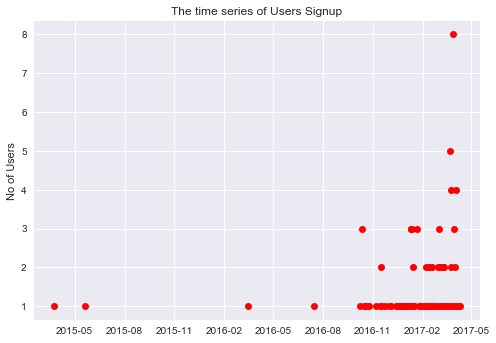

In [7]:
#Plot the change of the number of user signup along with time
dates = user.groupby("signup_date").count()
x1 = np.array(dates.index)
y1 = np.array(dates['user_id'])
plt.plot_date(x1,y1, color ="r")
plt.title("The time series of Users Signup")
plt.ylabel("No of Users")
plt.show()

According the figure above, there are seldom users signing up before 2016-10, but after that, the number of signup increases a lot and more and more signups along with time.

# Plot the change of the number of enterprise user signup along with time

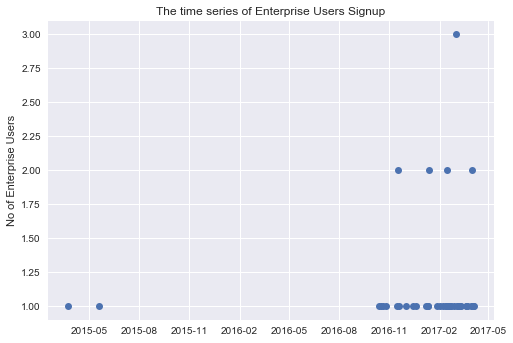

In [8]:
#Plot the change of the number of enterprise user signup along with time
entpr = user[user["type"]=="Enterprise"]
entpr_dates = entpr.groupby("signup_date").count()
x2 = np.array(entpr_dates.index)
y2 = np.array(entpr_dates['user_id'])
plt.plot_date(x2,y2)
plt.title("The time series of Enterprise Users Signup")
plt.ylabel("No of Enterprise Users")
plt.show()

According the figure above, there are seldom enterprise users signing up before 2016-10, but after that, the number of enterprise signup increases a lot and more and more signups along with time.

# Plot the change of the number of individual user signup along with time

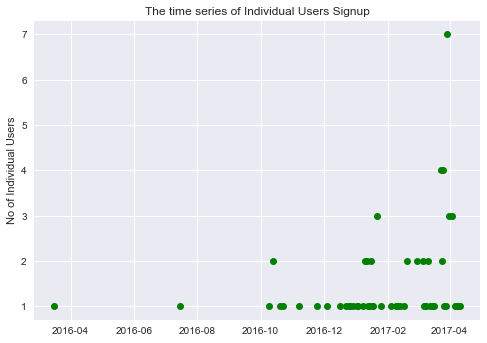

In [9]:
#Plot the change of the number of individual user signup along with time
indiv = user[user["type"]=="Individual"]
indiv_dates = indiv.groupby("signup_date").count()
x3 = np.array(indiv_dates.index)
y3 = np.array(indiv_dates['user_id'])
plt.plot_date(x3,y3, color ='green')
plt.title("The time series of Individual Users Signup")
plt.ylabel("No of Individual Users")
plt.show()

According the figure above, there are seldom indivdual users signing up before 2016-10, but after that, the number of individual signup increases a lot and more and more signups along with time.

# Plot the change of the number of individual user signup along with time

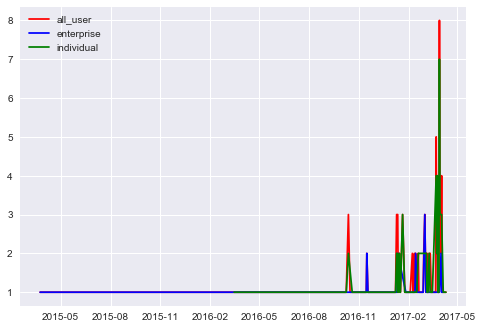

In [10]:
#Plot the change of the number of individual user signup along with time
plt.plot_date(x1,y1, fmt ='red')
plt.plot_date(x2,y2, fmt ='blue')
plt.plot_date(x3,y3, fmt ='green')
plt.legend(['all_user', 'enterprise', 'individual'])
plt.show()

# Plot the pie chart to display the proportion of different types 

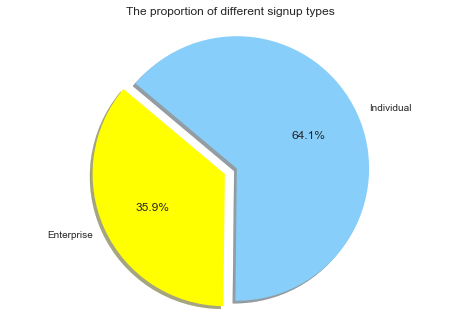

In [11]:

#Plot the pie chart of the proportion of different signup types
cnt = Counter(user["type"])
labels =tuple(cnt.keys())
sizes = list(cnt.values())
colors = ['yellow','lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("The proportion of different signup types")
plt.show()

According to the figure above, almost 2/3 of users are individual types and 1/3 of users are enterprise types.

# Import ops dataset

In [12]:
ops = pd.read_csv("ops.csv")
ops['op_time'] = pd.to_datetime(ops['op_time'])
ops['hour'] = ops['op_time'].apply(lambda x: x.hour)
print("The total number of data in ops data set is " +str(len(ops['user_id'])))
ops.head()
 

The total number of data in ops data set is 56142


,op_time,user_id,op_count,response,hour
0,2016-09-29 19:04:00,c1347e11416f,1,200,19
1,2016-09-29 19:04:00,c1347e11416f,1,200,19
2,2016-09-29 19:04:00,c1347e11416f,1,200,19
3,2016-09-29 19:04:00,c1347e11416f,1,200,19
4,2016-09-29 19:04:00,c1347e11416f,1,200,19


# Check unique user_id

In [13]:
print("The total number of unique user in ops data set is " +str(len(ops['user_id'].unique())))

The total number of unique user in ops data set is 128


# Check whether these columns include null/missing values

In [14]:
time_notnull = Counter(ops["op_time"].notnull())
print("The number of op_time values not null is " + str(list(time_notnull.items())[0][1]))


The number of op_time values not null is 56142


In [15]:
user_notnull =Counter(ops["user_id"].notnull())
print("The number of user_id values not null is " + str(list(user_notnull.items())[0][1]))

The number of user_id values not null is 56142


In [16]:
count_notnull =Counter(ops["op_count"].notnull())
print("The number of op_count values not null is " + str(list(count_notnull.items())[0][1]))

The number of op_count values not null is 56142


In [17]:
res_notnull =Counter(ops["response"].notnull())
print("The number of response values not null is " + str(list(res_notnull.items())[0][1]))

The number of response values not null is 56142


After checking the columns, there are no missing values in ops data set.

# Plot the count of operations along with time

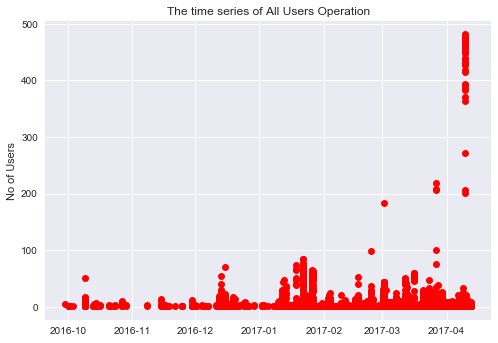

In [18]:
#Plot the count of all users' operations along with time
dates = ops.groupby("op_time").count()
x4 = np.array(dates.index)
y4 = np.array(dates['op_count'])
plt.plot_date(x4,y4, color ="r")
plt.title("The time series of All Users Operation")
plt.ylabel("No of Users")
plt.show()

According the plot above, since 2016-10, the users began to operate at clarifai, and more and more operations happened along with time.

# Plot the sum of response along with time

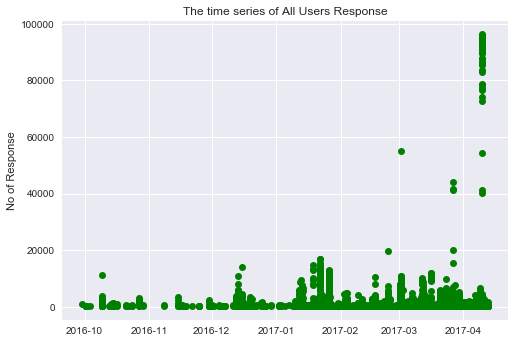

In [19]:
# Plot the sum of all users' response along with time
resp = ops.groupby("op_time")['response'].sum()

x5 = np.array(resp.index)
y5 = np.array(resp.values)
plt.plot_date(x5,y5, color ="g")
plt.title("The time series of All Users Response")
plt.ylabel("No of Response")
plt.show()

According the plot above, since 2016-10, the users began to operate at clarifai, and response becomes much longer along with time,especially around 2017-04.

# Plot the count of operations at 24-hour base 

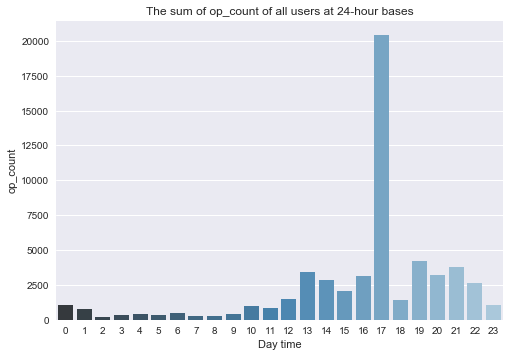

In [20]:
# Plot the count of all users' operations at 24-hour base 
hour_count = ops.groupby('hour')['op_count'].count()
hour_count = pd.Series.to_frame(hour_count)
hour_count['hours'] = hour_count.index
ax =sns.barplot('hours', y='op_count', data=hour_count, palette="Blues_d")
ax.set(xlabel='Day time', ylabel='op_count', title ="The sum of op_count of all users at 24-hour bases")
plt.show()

According to the plot above, the most operations happen from 10:00 to 23:00, and around 17:00 the number of opertations reaches the peak. 

# Merge dataset ops and user 

In [21]:
data = pd.merge(ops, user, on ="user_id", how ="inner")
data.loc[data['response'] ==200, "good"] =1 
data.loc[data['response'] !=200, "good"] =0 
data.loc[data['response'] ==400, "bad"] =1 
data.loc[data['response'] !=400, "bad"] =0 
data.head()

,op_time,user_id,op_count,response,hour,signup_date,type,good,bad
0,2016-09-29 19:04:00,c1347e11416f,1,200,19,2016-07-15,Individual,1.0,0.0
1,2016-09-29 19:04:00,c1347e11416f,1,200,19,2016-07-15,Individual,1.0,0.0
2,2016-09-29 19:04:00,c1347e11416f,1,200,19,2016-07-15,Individual,1.0,0.0
3,2016-09-29 19:04:00,c1347e11416f,1,200,19,2016-07-15,Individual,1.0,0.0
4,2016-09-29 19:04:00,c1347e11416f,1,200,19,2016-07-15,Individual,1.0,0.0


# Calculate the sum and mean of the op_count of every individual user

In [22]:
ind_data = data[data['type'] =="Individual"]
#average of op_count of every user 
ind_count = len(ind_data)/len(ind_data["user_id"].unique())
#average of response of every user

print("The sum of the op_count of individual users is "+ str(len(ind_data)))

print("The mean of the op_count of every individual user is "+ str(ind_count))


The sum of the op_count of individual users is 28490
The mean of the op_count of every individual user is 347.4390243902439


# Calculate the sum and mean of the op_count of every enterprise user

In [23]:
ent_data = data[data['type'] =="Enterprise"]
ent_count = len(ent_data)/len(ent_data["user_id"].unique())

print("The sum of the op_count of enterprise users is "+ str(len(ent_data)))

print("The mean of the op_count of every enterprise user is "+ str(ent_count))


The sum of the op_count of enterprise users is 27652
The mean of the op_count of every enterprise user is 601.1304347826087


# Plot the proportion of op_count of different signup types

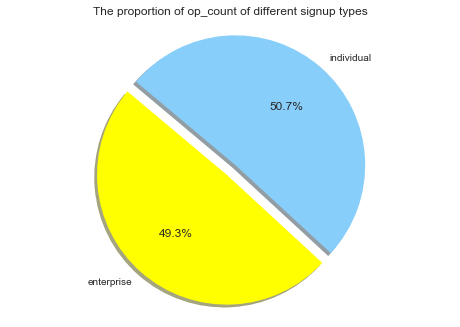

In [24]:
labels =("enterprise", "individual")
sizes = [len(ent_data)/(len(ent_data)+len(ind_data)),len(ind_data)/(len(ent_data)+len(ind_data))]
colors = ['yellow','lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("The proportion of op_count of different signup types")
plt.show()

According to the plot and the result calculated above, the count of operations of all individuals and enterprise users almost the same, but the mean of op_count of individuals is much less than that of enterprises.

# Plot the proportion of good response and bad response

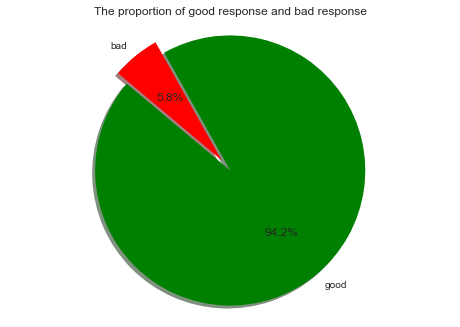

In [25]:
good_res = len(data[data["good"]==1.0])
bad_res = len(data[data["good"]!=1.0]) 
labels =("good", "bad")
sizes = [good_res/(good_res+bad_res), bad_res/(good_res+bad_res)]
colors = ['green','red']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("The proportion of good response and bad response")
plt.show()

According to the plot above, we can see almost all responses at Clarifai are good response, and only 5.8% are bad responses.

# Plot the proportion of good responses of different signup types

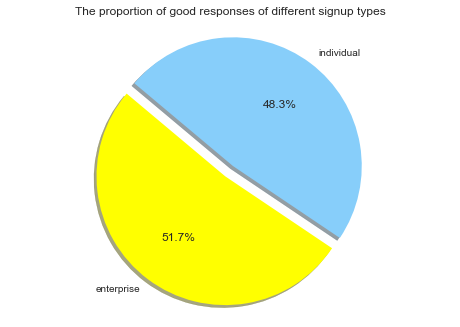

In [26]:
#
good = data[data["good"]==1.0]
ent = len(good[good['type']=='Enterprise'])
indi = len(good[good['type']=='Individual'])
labels =("enterprise", "individual")
sizes = [ent/(ent+indi), indi/(ent+indi)]
colors = ['yellow','lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("The proportion of good responses of different signup types")
plt.show()

According to the plot above, the proportion of good responses of enterprise type and individual type are half and half.

# Plot the proportion of bad responses of different signup types

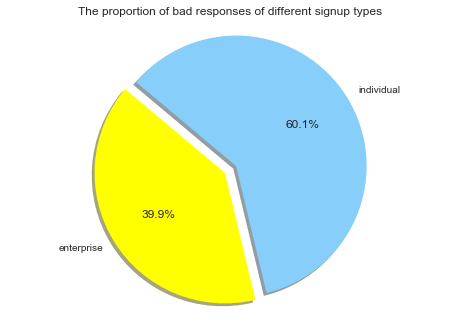

In [27]:
#
bad = data[data["bad"]==1.0]
ent = len(bad[bad['type']=='Enterprise'])
indi = len(bad[bad['type']=='Individual'])
labels =("enterprise", "individual")
sizes = [ent/(ent+indi), indi/(ent+indi)]
colors = ['yellow','lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("The proportion of bad responses of different signup types")
plt.show()

According to the plot and the result calculated above, the proportion of bad response of enterprise are much less than that of individuals.

# Plot the sum of op_count of individual users at 24-hour base

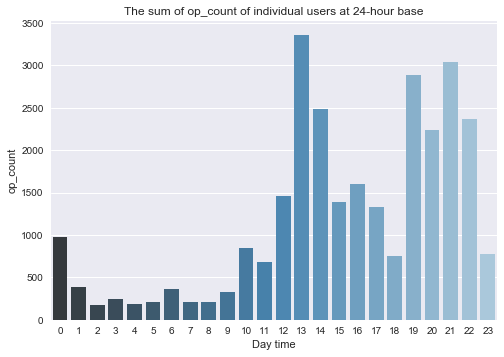

In [28]:
ind_hcnt = ind_data.groupby('hour')['op_count'].count()
ind_hcnt = pd.Series.to_frame(ind_hcnt)
ind_hcnt['hours'] = ind_hcnt.index
ax =sns.barplot('hours', y='op_count', data=ind_hcnt, palette="Blues_d")
ax.set(xlabel='Day time', ylabel='op_count', title ="The sum of op_count of individual users at 24-hour base")
plt.show()


According to the plot above, the most of the operations of all individuals happen from 10:00 to 00:00. 

# Plot the sum of op_count of enterprise users at 24-hour base

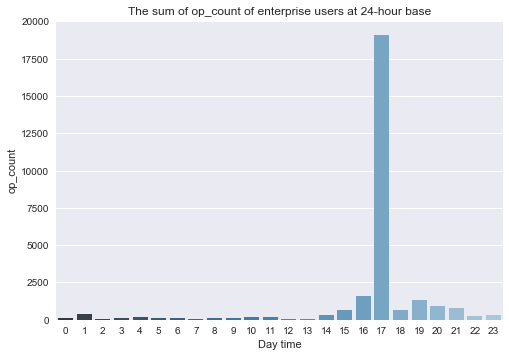

In [29]:
ent_hcnt = ent_data.groupby('hour')['op_count'].count()
ent_hcnt = pd.Series.to_frame(ent_hcnt)
ent_hcnt['hours'] = ent_hcnt.index
ax =sns.barplot('hours', y='op_count', data=ent_hcnt, palette="Blues_d")
ax.set(xlabel='Day time', ylabel='op_count', title ="The sum of op_count of enterprise users at 24-hour base")
plt.show()


According to the plot above, the most op_count of enterprise users happen at 17:00.

# Plot the number of different response status of users at 24-hour base

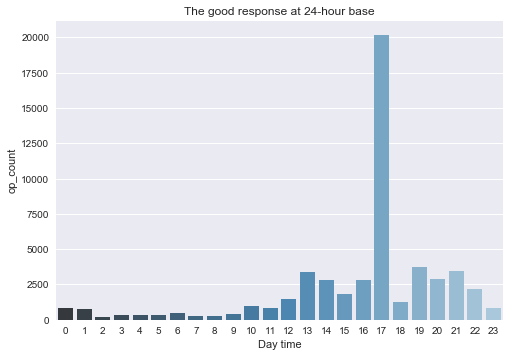

In [30]:

resp =data.groupby('hour')['good'].sum()

resp = pd.Series.to_frame(resp)
resp['hours'] = resp.index
ax =sns.barplot('hours', y='good', data=resp, palette="Blues_d")
ax.set(xlabel='Day time', ylabel='op_count', title ="The good response at 24-hour base")
plt.show()

According to the plot above, because there are more operations around 17:00 then there are also a large amount of good response ar around 17:00.

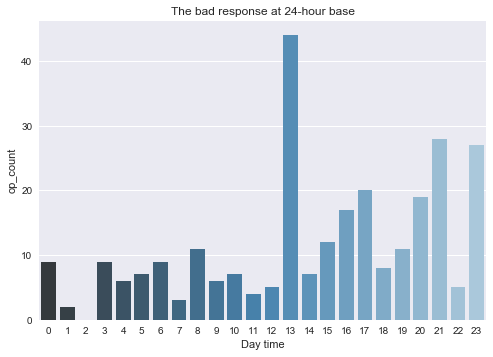

In [31]:
bad =data.groupby('hour')['bad'].sum()
bad = pd.Series.to_frame(bad)
bad['hours'] = bad.index
ax =sns.barplot('hours', y='bad', data=bad, palette="Blues_d")
ax.set(xlabel='Day time', ylabel='op_count', title ="The bad response at 24-hour base")
plt.show()

According to the plot above, the bad response often happens at around 13:00.

# Business Question?

# When should be the possible time with the largest amount of op_count of enterprise during a day?

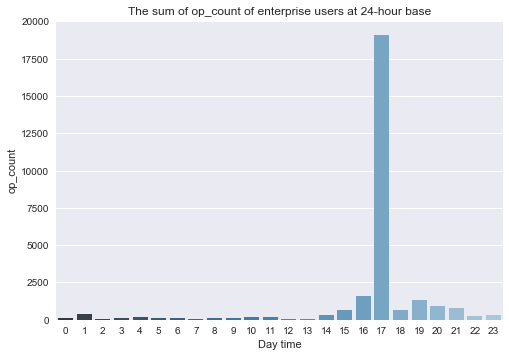

In [32]:
ent_hcnt = ent_data.groupby('hour')['op_count'].count()
ent_hcnt = pd.Series.to_frame(ent_hcnt)
ent_hcnt['hours'] = ent_hcnt.index
ax =sns.barplot('hours', y='op_count', data=ent_hcnt, palette="Blues_d")
ax.set(xlabel='Day time', ylabel='op_count', title ="The sum of op_count of enterprise users at 24-hour base")
plt.show()


According to the plot above,  the most operations of enterprise users happen at 17:00.

# If I have more time, I wanna to analyze what kind of specific operations a user did with Clarifai,  which products are most attractive to users, and what kind of product a certain user might be interested, ...